In [1]:
# For execution in google colab
#!git clone https://github.com/Marlup/Simulation-of-investment-and-compound-returns.git

In [21]:
import sys
import os
sys.path.append(os.path.abspath("src"))

# data processing
import numpy as np
import pandas as pd
# pyplot
from matplotlib import pyplot as plt
# seaborn
import seaborn as sns
# bokeh
from bokeh import plotting as bk
from bokeh.io import output_file

from src.plottings.plottings import (
    plot_scenario_bokeh
)

from src.utils.utils import (
    build_dataframe
)

from src.simulation.simulator import (
    CompoundReturnSimulator,
    simulate_compound_return,
    simulate_scenarios
)

#output_notebook()
output_file("image.html", title="Investment and Compound Returns")

In [2]:
CURRENCY = "€"
# For execution in google colab
#os.chdir("./Simulation-of-investment-and-compound-returns")

In [3]:
sns.set_style('darkgrid')
sns.color_palette("Paired")
sns.set_palette("Paired")

## Compound return by theoretical function

In [6]:
# Calculation of composed return. Composed return function
principal_amount = 10_000
roi = 0.06
compounding_frequency = 1
annual_contribution = 2400
inc_contribution_rate = 0.01
investment_duration_years = 60

amount, accum_roi = simulate_compound_return(
    principal_amount,
    roi,
    compounding_frequency,
    annual_contribution,
    inc_contribution_rate,
    investment_duration_years,
    return_series=True
    )
print(f"Total amount {amount}")
print(f"Accumulated roi {accum_roi}")

Total amount 281396.0313890306
Accumulated roi {'stable_yield': None, 'contributions': [200.16666666666666, 200.33347222222218, 200.50041678240734, 200.66750046305933, 200.83472338011185, 201.00208564959527, 201.1695873876366, 201.3372287104596, 201.50500973438497, 201.67293057583026, 201.8409913513101, 202.00919217743618, 202.17753317091734, 202.34601444855974, 202.51463612726687, 202.68339832403956, 202.85230115597625, 203.02134474027287, 203.19052919422307, 203.35985463521826, 203.5293211807476, 203.6989289483982, 203.86867805585518, 204.0385686209017, 204.20860076141912, 204.37877459538694, 204.5490902408831, 204.7195478160838, 204.89014743926384, 205.06088922879655, 205.23177330315386, 205.40279978090646, 205.57396878072387, 205.74528042137445, 205.91673482172558, 206.08833210074366, 206.26007237749425, 206.43195577114216, 206.60398240095142, 206.77615238628553, 206.9484658466074, 207.12092290147956, 207.2935236705641, 207.4662682736229, 207.63915683051755, 207.81218946120964, 207

## Simulation of compound return

### One scenario

In [ ]:
# @title Investing parameters for yields scenario

# Define initial parameters
initial_principal = 10_000 # @param {type:"number", "min": 0.0, "max": 1.0e8}
monthly_contribution = 200 # @param {type:"number", "min": 0.0, "max": 1.0e8}
annual_contribution = 12 * monthly_contribution
inc_contribution_rate = 0.01 # @param {type:"number", "min": 0.0, "max": 0.1}
annual_roi = 0.07 # @param {type:"number", "min": 0.0, "max": 1.0}
investment_duration_years = 60 # @param {type:"number", "min": 0, "max": 150}
retirement_at_years = 30 # @param {type:"number", "min": 0, "max": 150}
monthly_retirement_income = 1200 # @param {type:"number", "min": 0.0, "max": 1.0e4}
inflation_rate = 0.02 # @param {type:"number", "min": 0.0, "max": 0.2}
tax_rate = 0.21 # @param {type:"number", "min": 0.0, "max": 0.3}
 # Compounding once per year
compounding_frequency = 12 # @param {type:"number", "min": 0, "max": 24}

# Calculate the total balance and earnings using the updated function
total_balance, info = simulate_compound_return(
    principal=initial_principal,
    annual_roi=annual_roi,
    yield_frequency=compounding_frequency,
    annual_contribution=annual_contribution,
    inc_contribution_rate=inc_contribution_rate,
    investment_duration=investment_duration_years,
    retirement_at=retirement_at_years,
    monthly_retirement_income=monthly_retirement_income,
    inflation_rate=inflation_rate,
    tax_rate=tax_rate,
    return_series=True
)

print(f"keys: {info.keys()}")


# Calculate total earnings, total input contribution, and earnings per contribution
balances = info['balances']

earnings = info['net_earnings']
total_earnings = sum(earnings)

contributions = info['contributions']
total_contributions = sum(contributions)

# Print the results
print(f"Total balance after {investment_duration_years} years: {round(total_balance, 2)}")
print(f"Total earnings:, {round(total_earnings, 2)}")
print(f"Total contributions:, {round(total_contributions, 2)}")

# Basic plot setup
renderer_e, renderer_b = plot_scenario_bokeh(earnings, balances, w=800)

_ , _ = bk.show(renderer_e, notebook_handle=True), bk.show(renderer_b, notebook_handle=True)

keys: dict_keys(['stable_yield', 'contributions', 'before_retirement_contributions', 'gross_earnings', 'net_earnings', 'balances', 'tax_from_earnings', 'inflation_from_earnings'])
Total balance after 60 years: -34207.05
Total earnings: 2544621.98
Total contributions: 83995.58


In [8]:
max(info['balances']), max(info['net_earnings']), max(info["inflation_from_earnings"])

(226997.3269261618, 11507.200496503496, 291.3215315570511)

High yield with low contribution

In [17]:
# @title Investing parameters for yields scenario

# Define initial parameters
initial_principal = 10_000 # @param {type:"number", "min": 0.0, "max": 1.0e8}
monthly_contribution = 200 # @param {type:"number", "min": 0.0, "max": 1.0e8}
annual_contribution = 12 * monthly_contribution
inc_contribution_rate = 0.01 # @param {type:"number", "min": 0.0, "max": 0.1}
annual_roi = 0.07 # @param {type:"number", "min": 0.0, "max": 1.0}
investment_duration_years = 60 # @param {type:"number", "min": 0, "max": 150}
retirement_at_years = 30 # @param {type:"number", "min": 0, "max": 150}
monthly_retirement_income = 1200 # @param {type:"number", "min": 0.0, "max": 1.0e4}
inflation_rate = 0.02 # @param {type:"number", "min": 0.0, "max": 0.2}
tax_rate = 0.21 # @param {type:"number", "min": 0.0, "max": 0.3}
 # Compounding once per year
compounding_frequency = 6 # @param {type:"number", "min": 0, "max": 24}

# Calculate the total balance and earnings using the updated function
total_balance, info = simulate_compound_return(
    principal=initial_principal,
    annual_roi=annual_roi,
    yield_frequency=compounding_frequency,
    annual_contribution=annual_contribution,
    inc_contribution_rate=inc_contribution_rate,
    investment_duration=investment_duration_years,
    retirement_at=retirement_at_years,
    monthly_retirement_income=monthly_retirement_income,
    inflation_rate=inflation_rate,
    tax_rate=tax_rate,
    return_series=True
)

balances = info['balances']
earnings = info['net_earnings']
contributions = sum(info['contributions'])

# Calculate total earnings, total input contribution, and earnings per contribution
total_earnings = sum(earnings)

# Print the results
print(f"Total balance after {investment_duration_years} years:", round(total_balance, 2))
print("Total earnings:", round(total_earnings, 2))
print("Total contribution:", round(contributions, 2))

# Basic plot setup
renderer_e, renderer_b = plot_scenario_bokeh(earnings, balances)

Total balance after 60 years: -350.37
Total earnings: 1722853.34
Total contribution: 83995.58


In [18]:
bk.show(renderer_e)

In [20]:
bk.show(renderer_b)

In [11]:
info.keys()

dict_keys(['stable_yield', 'contributions', 'before_retirement_contributions', 'gross_earnings', 'net_earnings', 'balances', 'tax_from_earnings', 'inflation_from_earnings'])

### Multi-scenarios

In [ ]:
step_amount = 5_000
max_amount = 20_000
initial_amounts = np.arange(step_amount,
                            max_amount + step_amount,
                            step_amount)
terms = [1, 6, 12]
virtual_returns = np.arange(0.06, 0.1, 0.01).tolist()
annual_contributions = list(map(lambda x: 12 * x, range(50, 500, 50)))
inc_contributions = [0.01, 0.03, 0.05, 0.1]
years_of_investment = [40, 50, 60]#np.arange(30, 30 + 5, 5)
inflation_rates = [0.02, 0.03, 0.04]#np.arange(30, 30 + 5, 5)
retirement_years = [30]
monthly_retirement_incomes = [
    0.5e3,
    1.0e3,
    1.5e3,
    2.0e3
    ]
#tax_rate = [0.25]
tax_rate = ["spain"]
retirement_contribution_rate = [0.1]

results = simulate_scenarios(
    initial_amounts,
    virtual_returns,
    years_of_investment,
    terms,
    annual_contributions,
    inc_contributions,
    inflation_rates,
    monthly_retirement_incomes,
    retirement_years,
    tax_rate
    )

columns = (
    'initial_amount',
    'roi',
    'duration',
    'frequency',
    'contribution',
    'inc_contribution',
    'inflation_rate',
    'monthly_retirement_income',
    'retirement_at',
    'tax_rate',
    'stable_yield',
    'total_amount'
)
df = build_dataframe(results, columns)
df

,initial_amount,roi,duration,frequency,contribution,inc_contribution,inflation_rate,monthly_retirement_income,retirement_at,tax_rate,stable_yield,total_amount
0,5000,0.06,40,1,600,0.01,0.02,500.0,30,spain,NaN,9.508776e+03
1,5000,0.06,40,1,600,0.01,0.02,1000.0,30,spain,NaN,-5.540227e+04
2,5000,0.06,40,1,600,0.01,0.02,1500.0,30,spain,NaN,-1.125533e+05
3,5000,0.06,40,1,600,0.01,0.02,2000.0,30,spain,NaN,-1.681784e+05
4,5000,0.06,40,1,600,0.01,0.03,500.0,30,spain,NaN,-8.196039e+03
...,...,...,...,...,...,...,...,...,...,...,...,...
77755,20000,0.10,60,12,5400,0.10,0.03,2000.0,30,spain,NaN,1.345085e+07
77756,20000,0.10,60,12,5400,0.10,0.04,500.0,30,spain,NaN,9.775979e+06
77757,20000,0.10,60,12,5400,0.10,0.04,1000.0,30,spain,NaN,9.295755e+06
77758,20000,0.10,60,12,5400,0.10,0.04,1500.0,30,spain,NaN,8.815531e+06


## Investment scenarios

### Filter the scenarios to adapt to a certain investor

- Initial amount: 10k to 15k
- Maximum return of investment (ROI): 10%
- Maximum term (months): 12
- Annual contribution: 1.2k to 3.8k
- Investment total period (years): 60
- Monthly income after retirement: 500 to 2000
- Annual inflation rate: 2 to 4 %

Final balance must be positive

In [33]:
# Filter cases
initial_amounts = (10_000, 15_000)
max_roi = 0.1
max_term = 12
contributions = (1200, 3800)
#inc_contributions = (0.01, 0.1)
min_years = 60
monthly_retirement_incomes = (500, 2000)
inflation_rates = (0.02, 0.04)

df_positive = df[df["total_amount"] > 0.0]
# Round up 'total_amount'
df_positive["total_amount"] = df_positive["total_amount"].round(1)
print('Cases with positive amount:', df_positive.shape)

# Filter by example case
df_case = df_positive[(df_positive["initial_amount"].between(initial_amounts[0], initial_amounts[1])) & \
                      (df_positive["roi"] <= max_roi) & \
                      (df_positive["frequency"] <= max_term) & \
                      (df_positive["contribution"].between(contributions[0], contributions[1])) & \
                      #(df_positive["inc_contribution"].between(inc_contributions[0], inc_contributions[1])) & \
                      (df_positive["duration"] >= min_years) & \
                      (df_positive["monthly_retirement_income"].between(monthly_retirement_incomes[0], monthly_retirement_incomes[1])) & \
                      ((df_positive["inflation_rate"].between(inflation_rates[0], inflation_rates[1])))
                      ].sort_values(["roi", "frequency", "total_amount", "monthly_retirement_income", "contribution"],
                                    ascending=[True, True, False, False, False])
df_case

Cases with positive amount: (63672, 12)


C:\Users\marsu\AppData\Local\Temp\ipykernel_12160\3840058416.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive["total_amount"] = df_positive["total_amount"].round(1)


,initial_amount,roi,duration,frequency,contribution,inc_contribution,inflation_rate,monthly_retirement_income,retirement_at,tax_rate,stable_yield,total_amount
41748,15000,0.06,60,1,3600,0.10,0.02,500.0,30,spain,NaN,3088803.6
22308,10000,0.06,60,1,3600,0.10,0.02,500.0,30,spain,NaN,3034125.3
41749,15000,0.06,60,1,3600,0.10,0.02,1000.0,30,spain,NaN,2742767.0
22309,10000,0.06,60,1,3600,0.10,0.02,1000.0,30,spain,NaN,2688088.7
41700,15000,0.06,60,1,3000,0.10,0.02,500.0,30,spain,NaN,2543669.4
...,...,...,...,...,...,...,...,...,...,...,...,...
38699,10000,0.10,60,12,3600,0.01,0.04,2000.0,30,spain,NaN,55606.4
38517,10000,0.10,60,12,1200,0.03,0.04,1000.0,30,spain,NaN,41808.3
57939,15000,0.10,60,12,1200,0.01,0.02,2000.0,30,spain,NaN,39983.4
57945,15000,0.10,60,12,1200,0.01,0.04,1000.0,30,spain,NaN,21930.6


The financial outcomes the investor want

In [34]:
case_ini_amount = 10_000
case_years = 60

case_monthly_contribution = 200
case_annual_contribution = case_monthly_contribution * 12
retir_income = 1000

In [35]:
three_cases = df[(df["initial_amount"] == case_ini_amount) & \
                 (df["duration"] == case_years) & \
                 (df["contribution"] == case_annual_contribution) & \
                 (df["monthly_retirement_income"] == retir_income)
                ]
three_cases.head()

,initial_amount,roi,duration,frequency,contribution,inc_contribution,inflation_rate,monthly_retirement_income,retirement_at,tax_rate,stable_yield,total_amount
22177,10000,0.06,60,1,2400,0.01,0.02,1000.0,30,spain,NaN,-55906.002730
22181,10000,0.06,60,1,2400,0.01,0.03,1000.0,30,spain,NaN,-131800.247899
22185,10000,0.06,60,1,2400,0.01,0.04,1000.0,30,spain,NaN,-151733.819080
22189,10000,0.06,60,1,2400,0.03,0.02,1000.0,30,spain,NaN,95337.680382
22193,10000,0.06,60,1,2400,0.03,0.03,1000.0,30,spain,NaN,-73276.447946


### Three result cases

Pesimistic case:
- €10,000 initial amount
- 30 years of investment duration
- 12 months term
- €200 monthly contribution
- 1 % annual contribution increment
- €1,000 of retirement income
- 10 % of income from retirement to contribution
- 4 % mean inflation rate

Number of cases: 5


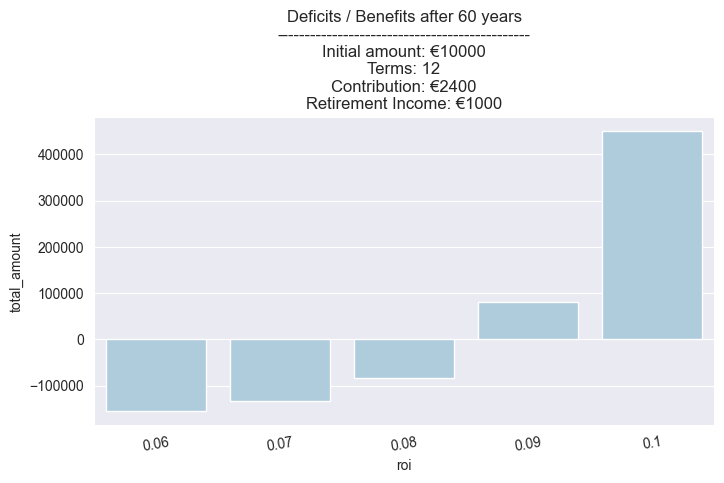

In [36]:
case_terms = 12
inc_contribution = 0.01
inflation_rate = 0.04

case_rois = three_cases[
    (three_cases["frequency"] == case_terms) & \
    (three_cases["monthly_retirement_income"] == retir_income) & \
    (three_cases["inc_contribution"] == inc_contribution) & \
    (three_cases["inflation_rate"] == inflation_rate)
][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {CURRENCY}{case_ini_amount}\nTerms: {case_terms}\nContribution: {CURRENCY}{case_annual_contribution}\nRetirement Income: {CURRENCY}{retir_income}"
_ = plt.title(f"Deficits / Benefits after {case_years} years\n----------------------------------------------\n"+ title)
_ = plt.xticks(rotation=10)

Moderated case:
- €10,000 initial amount
- 30 years of investment duration
- 12 months term
- €200 monthly contribution
- 3 % annual contribution increment
- €1,000 of retirement income
- 10 % of income from retirement to contribution
- 3 % mean inflation rate

Number of cases: 5


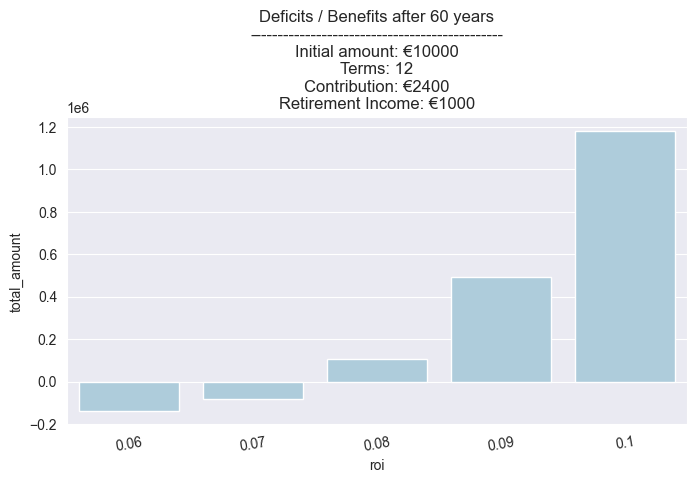

In [37]:
case_terms = 12
inc_contribution = 0.01
inflation_rate = 0.03

case_rois = three_cases[
    (three_cases["frequency"] == case_terms) & \
    (three_cases["monthly_retirement_income"] == retir_income) & \
    (three_cases["inc_contribution"] == inc_contribution) & \
    (three_cases["inflation_rate"] == inflation_rate)
][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {CURRENCY}{case_ini_amount}\nTerms: {case_terms}\nContribution: {CURRENCY}{case_annual_contribution}\nRetirement Income: {CURRENCY}{retir_income}"
_ = plt.title(f"Deficits / Benefits after {case_years} years\n----------------------------------------------\n"+ title)
_ = plt.xticks(rotation=10)

Optimistic case:
- €10,000 initial amount
- 30 years of investment duration
- 1 months term
- €200 monthly contribution
- 5 % annual contribution increment
- €1,000 of retirement income
- 10 % of retirement income to contribution
- 2 % mean inflation rate

Number of cases: 5


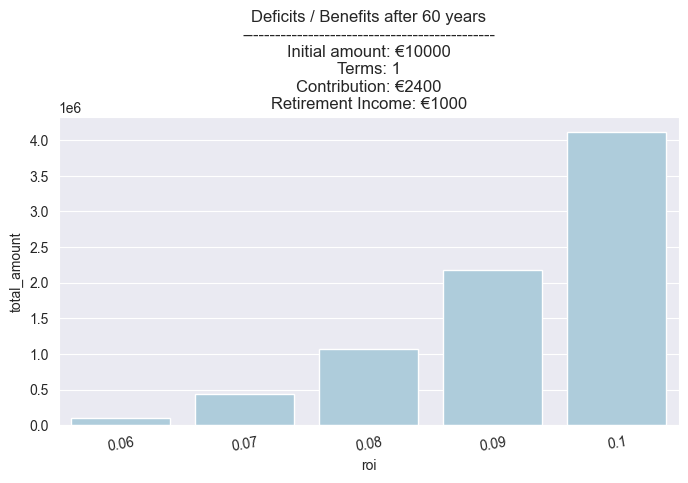

In [ ]:
case_terms = 1
inc_contribution = 0.03
inflation_rate = 0.02

case_rois = three_cases[
    (three_cases["frequency"] == case_terms) & \
    (three_cases["monthly_retirement_income"] == retir_income) & \
    (three_cases["inc_contribution"] == inc_contribution) & \
    (three_cases["inflation_rate"] == inflation_rate)
][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(
    data=case_rois,
    x="roi",
    y="total_amount",
)

title = f"Initial amount: {CURRENCY}{case_ini_amount}\nTerms: {case_terms}\nContribution: {CURRENCY}{case_annual_contribution}\nRetirement Income: {CURRENCY}{retir_income}"
_ = plt.title(f"Deficits / Benefits after {case_years} years\n----------------------------------------------\n"+ title)
_ = plt.xticks(rotation=10)

In [2]:
sim = CompoundReturnSimulator(
    principal=10_000,
    annual_roi=0.06,
    investment_duration=40,
    retirement_at=30,
    inflation_rate=0.025,
    tax="spain",
    return_series=True
)

final_balance, result_info = sim.simulate()

In [4]:
final_balance, result_info

(-32746.027390526204,
 {'contributions': [8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.333333333333334,
   8.3333333333